In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from factor_analyzer import FactorAnalyzer

# Generic Data Cleaning and EDA

### Import Data and Check the properties

In [2]:
df=pd.read_csv("Healthcare Associated Infections - Hospital.csv",encoding='latin1')

In [3]:
df.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                     Measure Name       Measure ID Compared to National  \
0  CLABSI: Lower Confidence Limit   HAI_1_CI_LOWER                  NaN   
1  CLABSI: Upper Confidence Limit   HAI_1_CI_UPPER                  NaN   
2   CLABSI: Number of Device Days  HAI_1_DOPC_DAYS                  NaN   
3         CLABSI: Predicted Cases  HAI_1_ELIGCASES                  NaN   
4          CLABSI: Observed Cases  HAI_1_NUMERATOR                  NaN   

   Score Footnote Measure Start Date Measure End Date  
0   1.03      NaN           1/1/2015       12/31/2015  
1  2.765      NaN           1/1/2015       12/31/2015  
2   7117      NaN           1/1/2015       12/31/2015  
3  9.198      NaN           1/1/2015       12/31/2015  
4     16      NaN           1/1/2015       12/31/2015

In [4]:
df.shape

(231264, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231264 entries, 0 to 231263
Data columns (total 15 columns):
Provider ID             231264 non-null int64
Hospital Name           231264 non-null object
Address                 231264 non-null object
City                    231264 non-null object
State                   231264 non-null object
ZIP Code                231264 non-null int64
County Name             230544 non-null object
Phone Number            231264 non-null int64
Measure Name            231264 non-null object
Measure ID              231264 non-null object
Compared to National    38544 non-null object
Score                   231264 non-null object
Footnote                103373 non-null object
Measure Start Date      231264 non-null object
Measure End Date        231264 non-null object
dtypes: int64(3), object(12)
memory usage: 26.5+ MB


In [6]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

Provider ID              0.00
Hospital Name            0.00
Address                  0.00
City                     0.00
State                    0.00
ZIP Code                 0.00
County Name              0.31
Phone Number             0.00
Measure Name             0.00
Measure ID               0.00
Compared to National    83.33
Score                    0.00
Footnote                55.30
Measure Start Date       0.00
Measure End Date         0.00
dtype: float64

#### Dropping columns having more than 50% null values and eliminating rows having null values

In [7]:
df= df.dropna(axis=1, thresh=int(0.5*len(df)))
df.shape

(231264, 13)

In [8]:
df=df.dropna(axis=0, how='any')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230544 entries, 0 to 231263
Data columns (total 13 columns):
Provider ID           230544 non-null int64
Hospital Name         230544 non-null object
Address               230544 non-null object
City                  230544 non-null object
State                 230544 non-null object
ZIP Code              230544 non-null int64
County Name           230544 non-null object
Phone Number          230544 non-null int64
Measure Name          230544 non-null object
Measure ID            230544 non-null object
Score                 230544 non-null object
Measure Start Date    230544 non-null object
Measure End Date      230544 non-null object
dtypes: int64(3), object(10)
memory usage: 24.6+ MB


In [10]:
# Drop duplicate records if any
df=df.drop_duplicates(keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230544 entries, 0 to 231263
Data columns (total 13 columns):
Provider ID           230544 non-null int64
Hospital Name         230544 non-null object
Address               230544 non-null object
City                  230544 non-null object
State                 230544 non-null object
ZIP Code              230544 non-null int64
County Name           230544 non-null object
Phone Number          230544 non-null int64
Measure Name          230544 non-null object
Measure ID            230544 non-null object
Score                 230544 non-null object
Measure Start Date    230544 non-null object
Measure End Date      230544 non-null object
dtypes: int64(3), object(10)
memory usage: 24.6+ MB


### Removing unwanted data -

### This step will be specific to your dataset 
data where most of the metrics are not available/not applicable wont give any info so removing such records.
Address , city, state can be removed as we have Zip Code 

In [11]:
df=df.drop(["Address","City","State","Phone Number"],axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230544 entries, 0 to 231263
Data columns (total 9 columns):
Provider ID           230544 non-null int64
Hospital Name         230544 non-null object
ZIP Code              230544 non-null int64
County Name           230544 non-null object
Measure Name          230544 non-null object
Measure ID            230544 non-null object
Score                 230544 non-null object
Measure Start Date    230544 non-null object
Measure End Date      230544 non-null object
dtypes: int64(2), object(7)
memory usage: 17.6+ MB


### Converting some categorical variables to numeric

In [13]:
df=df[~(df["Score"].isin(['Not Applicable','Not Available']))]

In [14]:
df["Score"] = df["Score"].apply(pd.to_numeric,errors='coerce')


In [15]:
df=df.fillna(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129219 entries, 0 to 231118
Data columns (total 9 columns):
Provider ID           129219 non-null int64
Hospital Name         129219 non-null object
ZIP Code              129219 non-null int64
County Name           129219 non-null object
Measure Name          129219 non-null object
Measure ID            129219 non-null object
Score                 129219 non-null float64
Measure Start Date    129219 non-null object
Measure End Date      129219 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 9.9+ MB


In [17]:
df = df.replace(['Not Available','Not Applicable'],0)

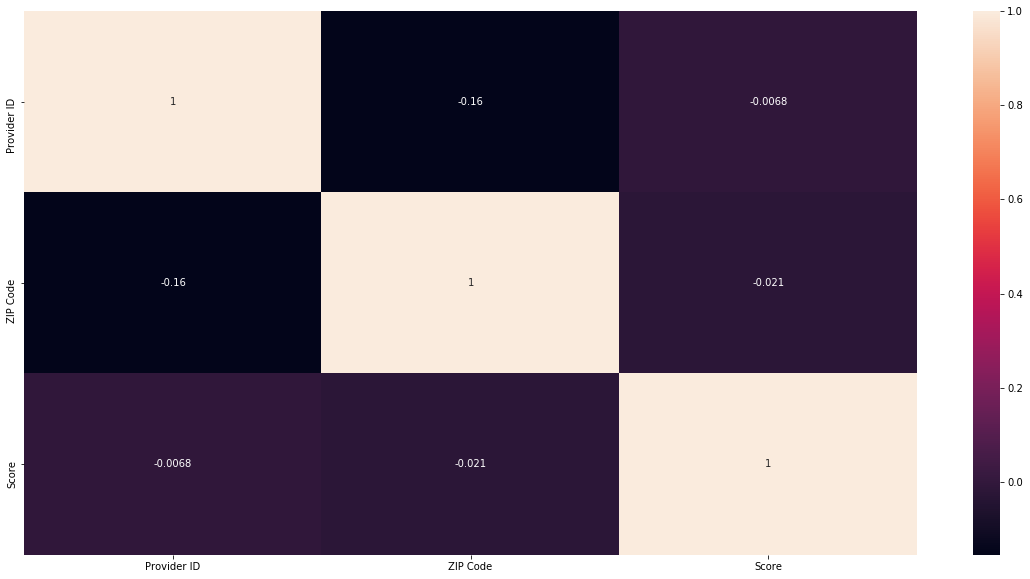

In [18]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

## We can see that there is no significant correlation amoung the columns ; hence heekping all these columns in the dataset for now ; we can later remove certain fields when we merge it to other datasets.

## Writing cleaned data to another file

In [19]:
#df.to_csv('Healthcare Associated Infections.csv')

In [20]:
# HAsocInf = df[:]
# HAsocInf.info()

## Read 'Healthcare Associated Infections.csv' to calculate final group score

In [21]:
#SafetyOfCare_df= pd.read_csv(r'C:\Users\Preethi\Downloads\Cleaned files\Cleaned files\Healthcare Associated Infections.csv',index_col = 0)

In [22]:
SafetyOfCare_df = df.copy()

In [23]:
SafetyOfCare_df.drop(['Hospital Name', 'ZIP Code','County Name', 'Measure Name', 'Measure Start Date',
       'Measure End Date'],axis=1,inplace=True)

In [24]:
SafetyOfCare_df.head()

Provider ID       Measure ID     Score
0        10001   HAI_1_CI_LOWER     1.030
1        10001   HAI_1_CI_UPPER     2.765
2        10001  HAI_1_DOPC_DAYS  7117.000
3        10001  HAI_1_ELIGCASES     9.198
4        10001  HAI_1_NUMERATOR    16.000

In [25]:
SafetyOfCare_df=SafetyOfCare_df.pivot_table(values= 'Score', index= 'Provider ID', columns= 'Measure ID')
SafetyOfCare_df.reset_index(inplace=True)
SafetyOfCare_df = SafetyOfCare_df.rename_axis(None)
SafetyOfCare_df.head()

Measure ID  Provider ID  HAI_1_CI_LOWER  HAI_1_CI_UPPER  HAI_1_DOPC_DAYS  \
0                 10001           1.030           2.765           7117.0   
1                 10005           0.337           2.561           2786.0   
2                 10006           0.138           0.710          11159.0   
3                 10007             NaN             NaN             48.0   
4                 10008             NaN             NaN             28.0   

Measure ID  HAI_1_ELIGCASES  HAI_1_NUMERATOR  HAI_1_SIR  HAI_1a_CI_LOWER  \
0                     9.198             16.0      1.740            1.130   
1                     3.767              4.0      1.062            0.032   
2                    17.577              6.0      0.341            0.141   
3                     0.110              0.0        NaN              NaN   
4                     0.042              0.0        NaN              NaN   

Measure ID  HAI_1a_CI_UPPER  HAI_1a_DOPC_DAYS  ...  HAI_5_DOPC_DAYS  \
0                     4.620            2191.0  ...          83773.0   
1                     3.196            1028.0  ...          36123.0   
2                     1.068            5377.0  ...          64858.0   
3                       NaN              48.0  ...           6930.0   
4                       NaN               NaN  ...           3923.0   

Measure ID  HAI_5_ELIGCASES  HAI_5_NUMERATOR  HAI_5_SIR  HAI_6_CI_LOWER  \
0                     7.111              3.0      0.422           0.562   
1                     1.441              2.0      1.388           0.177   
2                     3.173              4.0      1.261           0.309   
3                     0.203              0.0        NaN             NaN   
4                     0.141              0.0        NaN           0.029   

Measure ID  HAI_6_CI_UPPER  HAI_6_DOPC_DAYS  HAI_6_ELIGCASES  HAI_6_NUMERATOR  \
0                    1.073          81130.0           47.018             37.0   
1                    0.801          36262.0           17.293              7.0   
2                    0.805          62157.0           33.115             17.0   
3                    0.810           6930.0            3.699              0.0   
4                    2.883           3925.0            1.711              1.0   

Measure ID  HAI_6_SIR  
0               0.787  
1               0.405  
2               0.513  
3               0.000  
4               0.585  

[5 rows x 49 columns]

In [26]:
# selected only columns that are in the measures for the group 'Safety of care'
SafetyOfCare_df= SafetyOfCare_df[['Provider ID','HAI_1_SIR','HAI_2_SIR','HAI_3_SIR','HAI_4_SIR','HAI_5_SIR','HAI_6_SIR']]

In [27]:
SafetyOfCare_df.head()

Measure ID  Provider ID  HAI_1_SIR  HAI_2_SIR  HAI_3_SIR  HAI_4_SIR  \
0                 10001      1.740      1.427      1.870        0.0   
1                 10005      1.062      0.456      0.386        NaN   
2                 10006      0.341      0.641      0.310        NaN   
3                 10007        NaN      0.000        NaN        NaN   
4                 10008        NaN        NaN        NaN        NaN   

Measure ID  HAI_5_SIR  HAI_6_SIR  
0               0.422      0.787  
1               1.388      0.405  
2               1.261      0.513  
3                 NaN      0.000  
4                 NaN      0.585

### Another feature for Safety of care ie 'Complication/Patient Safety for Selected Indicators (PSI)' and 'Complication Rate Following Elective Primary Total Hip Arthroplasty (THA) and TotalKnee Arthroplasty (TKA)' is captured from Complications- Hospital csv.


In [28]:
SafetyOfCare_PSI_THA_TKA = pd.read_csv(r'C:\Users\Preethi\Downloads\Hospital_Revised_FlatFiles_20161110\Complications - Hospital.csv', index_col=0)

In [29]:
SafetyOfCare_PSI_THA_TKA.drop(['Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number','Compared to National', 'Denominator', 'Lower Estimate',
       'Higher Estimate', 'Footnote', 'Measure Start Date',
       'Measure End Date'],axis=1,inplace=True)

In [30]:
SafetyOfCare_PSI_THA_TKA=SafetyOfCare_PSI_THA_TKA[~(SafetyOfCare_PSI_THA_TKA["Score"].isin(['Not Applicable','Not Available']))]

In [31]:
SafetyOfCare_PSI_THA_TKA.head()

Measure Name  \
Provider ID                                                      
10001        Rate of complications for hip/knee replacement...   
10001                        Serious blood clots after surgery   
10001                     Blood stream infection after surgery   
10001        A wound that splits open  after surgery on the...   
10001         Accidental cuts and tears from medical treatment   

                            Measure ID Score  
Provider ID                                   
10001                    COMP_HIP_KNEE   3.8  
10001        PSI_12_POSTOP_PULMEMB_DVT  3.32  
10001               PSI_13_POST_SEPSIS  5.72  
10001              PSI_14_POSTOP_DEHIS  2.72  
10001                   PSI_15_ACC_LAC  1.35

In [32]:
SafetyOfCare_PSI_THA_TKA=SafetyOfCare_PSI_THA_TKA[~(SafetyOfCare_PSI_THA_TKA["Score"].isin(['Not Applicable','Not Available']))]

In [33]:
SafetyOfCare_PSI_THA_TKA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31124 entries, 10001 to 670106
Data columns (total 3 columns):
Measure Name    31124 non-null object
Measure ID      31124 non-null object
Score           31124 non-null object
dtypes: object(3)
memory usage: 972.6+ KB


In [34]:
SafetyOfCare_PSI_THA_TKA = SafetyOfCare_PSI_THA_TKA.replace(['Not Available','Not Applicable'],0)

In [35]:
SafetyOfCare_PSI_THA_TKA['Score']= SafetyOfCare_PSI_THA_TKA['Score'].astype(str).astype(float)

In [36]:
SafetyOfCare_PSI_THA_TKA=SafetyOfCare_PSI_THA_TKA.pivot_table(values= 'Score', index= 'Provider ID', columns= 'Measure ID')
SafetyOfCare_PSI_THA_TKA.reset_index(inplace=True)
SafetyOfCare_PSI_THA_TKA = SafetyOfCare_PSI_THA_TKA.rename_axis(None)
SafetyOfCare_PSI_THA_TKA.head()

Measure ID  Provider ID  COMP_HIP_KNEE  PSI_12_POSTOP_PULMEMB_DVT  \
0                 10001            3.8                       3.32   
1                 10005            3.0                       5.63   
2                 10006            3.8                       3.85   
3                 10007            NaN                       4.57   
4                 10008            NaN                        NaN   

Measure ID  PSI_13_POST_SEPSIS  PSI_14_POSTOP_DEHIS  PSI_15_ACC_LAC  \
0                         5.72                 2.72            1.35   
1                         9.18                 2.11            1.25   
2                          NaN                 2.50            1.93   
3                         9.89                  NaN            1.20   
4                          NaN                  NaN            1.41   

Measure ID  PSI_3_ULCER  PSI_4_SURG_COMP  PSI_6_IAT_PTX  PSI_7_CVCBI  \
0                  0.07           168.26           0.36         0.12   
1                  0.14           179.05           0.47         0.11   
2                  0.09           198.33           0.41         0.24   
3                  0.35              NaN           0.40         0.16   
4                  0.45              NaN           0.41         0.17   

Measure ID  PSI_8_POST_HIP  PSI_90_SAFETY  
0                     0.06           0.68  
1                     0.06           0.85  
2                     0.06           0.91  
3                     0.06           0.79  
4                      NaN           0.90

In [37]:
SafetyOfCare_PSI_THA_TKA.columns

Index(['Provider ID', 'COMP_HIP_KNEE', 'PSI_12_POSTOP_PULMEMB_DVT',
       'PSI_13_POST_SEPSIS', 'PSI_14_POSTOP_DEHIS', 'PSI_15_ACC_LAC',
       'PSI_3_ULCER', 'PSI_4_SURG_COMP', 'PSI_6_IAT_PTX', 'PSI_7_CVCBI',
       'PSI_8_POST_HIP', 'PSI_90_SAFETY'],
      dtype='object', name='Measure ID')

In [38]:
#SafetyOfCare_PSI_THA_TKA['PSI'] = 
# SafetyOfCare_PSI_columns = ['PSI_12_POSTOP_PULMEMB_DVT',
#                             'PSI_13_POST_SEPSIS', 'PSI_14_POSTOP_DEHIS', 'PSI_15_ACC_LAC',
#                             'PSI_3_ULCER', 'PSI_4_SURG_COMP', 'PSI_6_IAT_PTX', 'PSI_7_CVCBI',
#                             'PSI_8_POST_HIP', 'PSI_90_SAFETY']
# SafetyOfCare_PSI_THA_TKA['PSI'] = SafetyOfCare_PSI_THA_TKA[SafetyOfCare_PSI_columns].sum(axis=1)

In [39]:
SafetyOfCare_PSI_THA_TKA.drop(['PSI_12_POSTOP_PULMEMB_DVT',
                            'PSI_13_POST_SEPSIS', 'PSI_14_POSTOP_DEHIS', 'PSI_15_ACC_LAC',
                            'PSI_3_ULCER', 'PSI_4_SURG_COMP', 'PSI_6_IAT_PTX', 'PSI_7_CVCBI',
                            'PSI_8_POST_HIP'],axis=1,inplace=True)

In [40]:
SafetyOfCare_df_merged = pd.merge(SafetyOfCare_df, SafetyOfCare_PSI_THA_TKA, on='Provider ID', how='outer')

In [41]:
SafetyOfCare_df_merged.fillna(0, inplace=True)




In [42]:
SafetyOfCare_df_merged_copy = SafetyOfCare_df_merged.copy()

In [43]:
SafetyOfCare_df_merged_copy.to_csv('SafetyOfCare_clustering.csv')

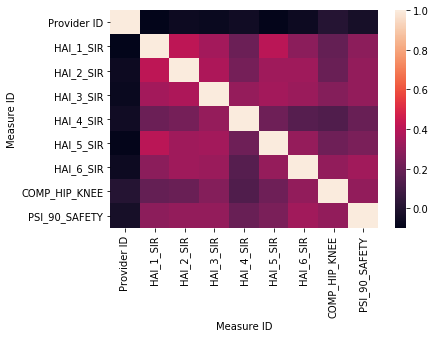

In [44]:
sns.heatmap(SafetyOfCare_df_merged.corr())

In [45]:
SafetyOfCare_meandf= SafetyOfCare_df_merged_copy.drop(['Provider ID'],axis=1,inplace=True)

In [46]:
#Let's check the eigenvalues route as well to find the number of factors
# Create factor analysis object and perform factor analysis with the number of factors equal to the number of columns
fa_SafetyOfCare = FactorAnalyzer(rotation = 'varimax',n_factors=1)
fa_SafetyOfCare.fit(SafetyOfCare_df_merged_copy)
fa_SafetyOfCare.loadings_

C:\Users\Preethi\Anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:626: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


array([[-0.5893615 ],
       [-0.60712774],
       [-0.61847301],
       [-0.37292411],
       [-0.56396983],
       [-0.55248028],
       [-0.4189625 ],
       [-0.52664204]])

In [47]:
SafetyOfCare_meandf= pd.DataFrame(SafetyOfCare_df_merged_copy.mean())
SafetyOfCare_meandf['index1'] = SafetyOfCare_meandf.index

In [48]:
SafetyOfCare_meandf = SafetyOfCare_meandf.rename_axis(None)
SafetyOfCare_meandf.rename(columns={'index1':'Measures',0:'mean'},inplace=True)
SafetyOfCare_meandf

mean       Measures
HAI_1_SIR      0.322283      HAI_1_SIR
HAI_2_SIR      0.347441      HAI_2_SIR
HAI_3_SIR      0.495959      HAI_3_SIR
HAI_4_SIR      0.187962      HAI_4_SIR
HAI_5_SIR      0.455575      HAI_5_SIR
HAI_6_SIR      0.673091      HAI_6_SIR
COMP_HIP_KNEE  2.081992  COMP_HIP_KNEE
PSI_90_SAFETY  0.723637  PSI_90_SAFETY

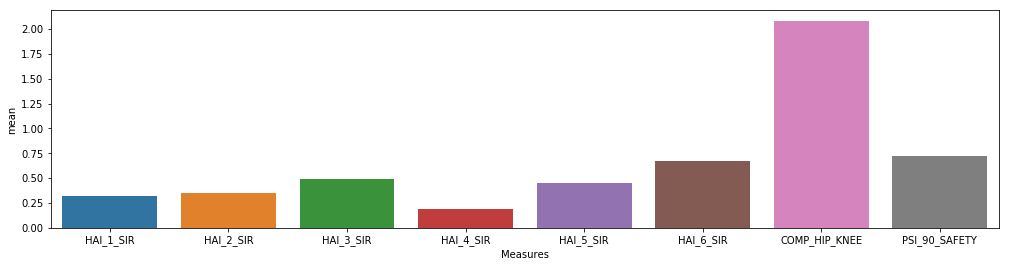

In [49]:
plt.figure(figsize=(17, 4))
ax = sns.barplot(y='mean', x='Measures', data=SafetyOfCare_meandf)

In [50]:
def factor_loading_weights(factors_list):
    sum_loadings = sum(factors_list)
    factor_weights = []
    for i in factors_list:
        factor = [round(((100/sum_loadings)*i)/100,2)]
        factor_weights.append(factor)
    return factor_weights

In [51]:
factors_list= [0.06,0.11,0.09,0.06,0.01,0.001,0.17,0.93]

weights = factor_loading_weights(factors_list)
weights

[[0.04], [0.08], [0.06], [0.04], [0.01], [0.0], [0.12], [0.65]]

In [52]:
# multiplying measure scores with respective weigts(loading coefficients)
SafetyOfCare_df_merged['HAI_1_SIR'] = SafetyOfCare_df_merged['HAI_1_SIR']*0.04
SafetyOfCare_df_merged['HAI_2_SIR']= SafetyOfCare_df_merged['HAI_2_SIR']*0.08
SafetyOfCare_df_merged['HAI_3_SIR']= SafetyOfCare_df_merged['HAI_3_SIR']*0.06
SafetyOfCare_df_merged['HAI_4_SIR']= SafetyOfCare_df_merged['HAI_4_SIR']*0.04
SafetyOfCare_df_merged['HAI_5_SIR']= SafetyOfCare_df_merged['HAI_5_SIR']*0.01
SafetyOfCare_df_merged['HAI_6_SIR']= SafetyOfCare_df_merged['HAI_6_SIR']*0.0
SafetyOfCare_df_merged['COMP_HIP_KNEE']= SafetyOfCare_df_merged['COMP_HIP_KNEE']*0.12
SafetyOfCare_df_merged['PSI_90_SAFETY']= SafetyOfCare_df_merged['PSI_90_SAFETY']*0.65

In [53]:
# Average of the weighted scores to calculated group score.
SafetyOfCare_df_merged['SafetyOfCare_score'] = ((SafetyOfCare_df_merged['HAI_1_SIR']+SafetyOfCare_df_merged['HAI_2_SIR']+
                               SafetyOfCare_df_merged['HAI_3_SIR']+SafetyOfCare_df_merged['HAI_4_SIR']+
                               SafetyOfCare_df_merged['HAI_5_SIR']+SafetyOfCare_df_merged['HAI_6_SIR']+
                               SafetyOfCare_df_merged['COMP_HIP_KNEE']+SafetyOfCare_df_merged['PSI_90_SAFETY'])/8)

In [54]:
# Dropping 'HAI_6_SIR' since it has zero weightage.

SafetyOfCare_df_merged.drop(['HAI_6_SIR'],axis=1,inplace=True)

In [55]:
SafetyOfCare_df_merged.head()

Measure ID  Provider ID  HAI_1_SIR  HAI_2_SIR  HAI_3_SIR  HAI_4_SIR  \
0                 10001    0.06960    0.11416    0.11220        0.0   
1                 10005    0.04248    0.03648    0.02316        0.0   
2                 10006    0.01364    0.05128    0.01860        0.0   
3                 10007    0.00000    0.00000    0.00000        0.0   
4                 10008    0.00000    0.00000    0.00000        0.0   

Measure ID  HAI_5_SIR  COMP_HIP_KNEE  PSI_90_SAFETY  SafetyOfCare_score  
0             0.00422          0.456         0.4420            0.149773  
1             0.01388          0.360         0.5525            0.128562  
2             0.01261          0.456         0.5915            0.142954  
3             0.00000          0.000         0.5135            0.064188  
4             0.00000          0.000         0.5850            0.073125

In [56]:
SafetyOfCare_df_merged.to_csv('SafetyOfCare_supervised_model.csv')